In [48]:
import cv2
import matplotlib.pyplot as plt

In [49]:
!pip install --upgrade scikit-image


Defaulting to user installation because normal site-packages is not writeable


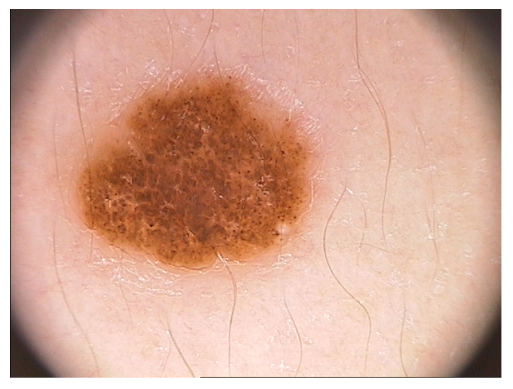

In [50]:
img_path = 'lab3_images/training/IMD016.bmp'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 
plt.show()
plt.axis('off')
plt.imshow(img_rgb)



In [51]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Defining patches
In the context of image analysis and computer vision, patches refer to small rectangular regions or sub-images extracted from a larger image. These are typically used for focused analysis, training machine learning models, or inspecting specific areas of interest within an image.

Format: (x, y, width, height)

In [52]:
lesion_patches = [
    (50, 50, 50, 50),
    (120, 80, 50, 50),
    (200, 150, 50, 50),
    (300, 250, 50, 50)
]
background_patches = [
    (10, 10, 50, 50),
    (400, 50, 50, 50),
    (100, 400, 50, 50),
    (300, 400, 50, 50)
]

In [53]:
img_grey.shape

(573, 765)

In [54]:
def extract_patches(image, patch_coords):
    patches = []
    for (x, y, w, h) in patch_coords:
        patches.append(image[y:y+h, x:x+w])
    return patches

In [64]:
lesion_images = extract_patches(img_rgb, lesion_patches)
background_images = extract_patches(img_rgb, background_patches)

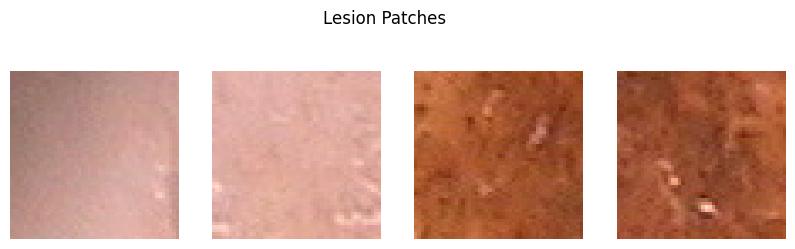

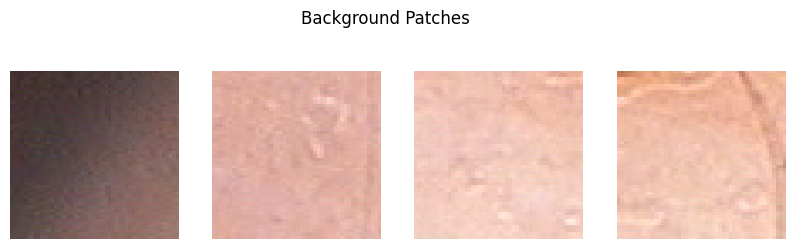

In [65]:
def display_patches(patches, title):
    plt.figure(figsize=(10, 3))
    plt.suptitle(title)
    for i, patch in enumerate(patches):
        plt.subplot(1, len(patches), i + 1)
        plt.imshow(patch)
        plt.axis("off")
    plt.show()

display_patches(lesion_images, "Lesion Patches")
display_patches(background_images, "Background Patches")

### GLCM (Gray-Level Co-occurrence Matrix
The Gray-Level Co-occurrence Matrix (GLCM) is a statistical method used in image processing to analyze the texture of an image. It describes the spatial relationship between pixel intensities (gray levels) in an image, providing information about the texture of the region.

In [57]:
from skimage import feature

In [58]:
from skimage.feature import graycomatrix, graycoprops

In [59]:
# lesion_patches = [(50, 50, 50, 50), (120, 80, 50, 50), (200, 150, 50, 50), (300, 250, 50, 50)]
# background_patches = [(10, 10, 50, 50), (400, 50, 50, 50), (100, 400, 50, 50), (300, 400, 50, 50)]


def extract_patches(image, patch_coords):
    patches = []
    for (x, y, w, h) in patch_coords:
        patches.append(image[y:y+h, x:x+w])
    return patches

lesion_images = extract_patches(img_grey, lesion_patches)
background_images = extract_patches(img_grey, background_patches)

In [60]:
print(lesion_images[0].shape)

(50, 50)


In [ ]:
def compute_glcm_properties(patch, distances=[1], angles=[0]):
    glcm = graycomatrix(patch, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    return contrast, dissimilarity, energy, correlation


In [62]:
lesion_features = [compute_glcm_properties(patch) for patch in lesion_images]
background_features = [compute_glcm_properties(patch) for patch in background_images]



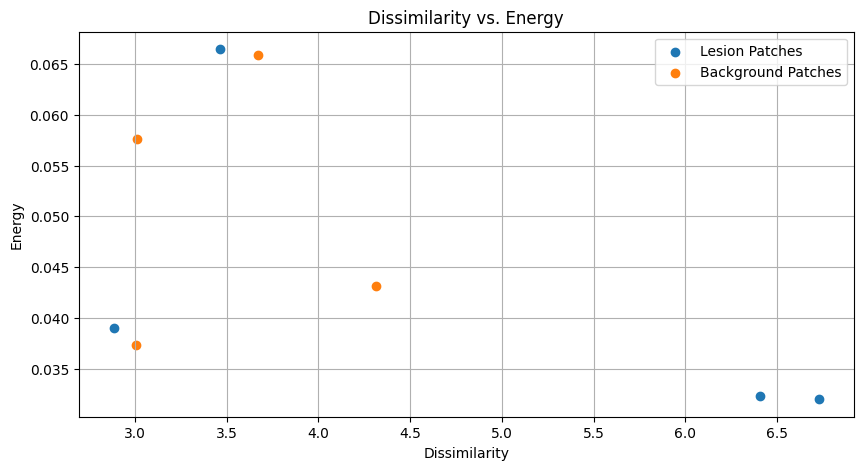

In [ ]:
def plot_dissimilarity_vs_energy(features, title):
    dissimilarity = [f[1] for f in features]  # Dissimilarity
    energy = [f[2] for f in features]        # Energy
    
    plt.scatter(dissimilarity, energy, label=title)
    plt.xlabel('Dissimilarity')
    plt.ylabel('Energy')
    plt.title('Dissimilarity vs. Energy')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(10, 5))
plot_dissimilarity_vs_energy(lesion_features, "Lesion Patches")
plot_dissimilarity_vs_energy(background_features, "Background Patches")
plt.show()

$$
\text{Dissimilarity} = \sum_{i,j} P(i,j) \cdot |i - j|
$$

$$
\text{Energy} = \sum_{i,j} P(i,j)^2
$$
Where:
- $P(i,j)$: The normalized value in the GLCM at position $(i, j)$, representing the probability of co-occurrence of gray levels $i$ and $j$.
- $i, j$: Gray levels of the pixels.

